# 3 小世界网络

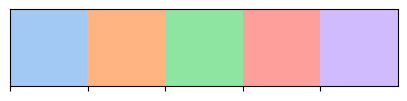

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

# I set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
sns.palplot(colors)
sns.set_palette(colors)

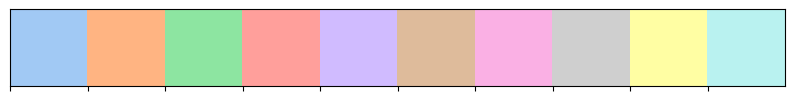

In [2]:
colors = sns.color_palette('pastel', 10)
sns.palplot(colors)
sns.set_palette(colors)

## 3.1 环格

- 在一个有 $n$ 个节点的环格中，节点可以排列成一个圆圈，每个节点与 $k$ 个最邻近节点相连。

In [3]:
def adjacent_edges(nodes, halfk):
    """Yields edges between each node and `halfk` neighbors.
    
    halfk: number of edges from each node
    """
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v

- 我们测试3个节点且`halfk=1`。

In [4]:
nodes = range(3)
for edge in adjacent_edges(nodes, 1):
    print(edge)

(0, 1)
(1, 2)
(2, 0)


接下来测试10个节点目

In [5]:
nodes = range(10)
for edge in adjacent_edges(nodes, 1):
    print(edge)

(0, 1)
(1, 2)
(2, 3)
(3, 4)
(4, 5)
(5, 6)
(6, 7)
(7, 8)
(8, 9)
(9, 0)


- 现在我们可以用`adjacent_edges`生成一个`make_ring_lattice`。

In [6]:
def make_ring_lattice(n, k):
    """Makes a ring lattice with `n` nodes and degree `k`.
    
    Note: this only works correctly if k is even.
    
    n: number of nodes
    k: degree of each node
    """
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

- 测试

In [7]:
lattice = make_ring_lattice(10, 4)

In [8]:
lattice2 = make_ring_lattice(30, 2)

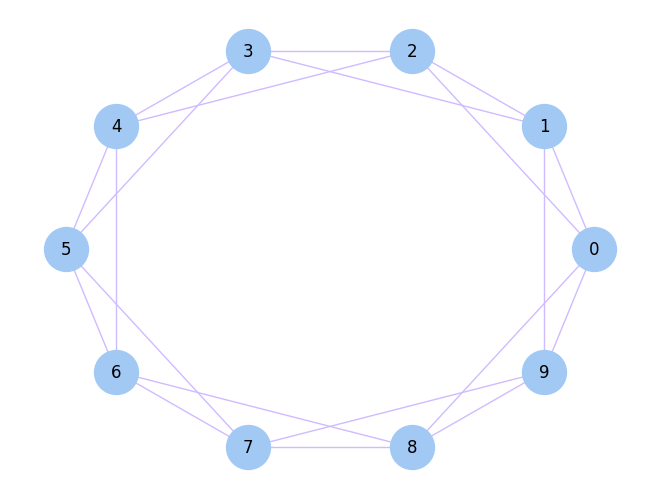

In [9]:
nx.draw_circular(lattice, 
                 node_color='C0',
                 edge_color='C4',
                 node_size=1000, 
                 with_labels=True)


画出新矩阵的图

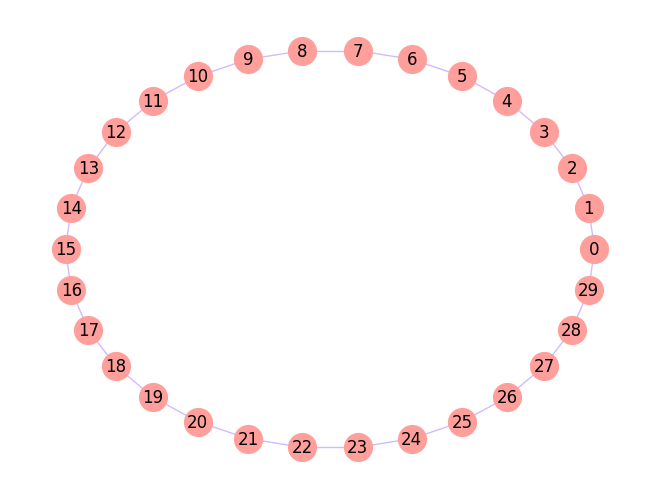

In [10]:
nx.draw_circular(lattice2, 
                 node_color='C3',
                 edge_color='C4',
                 node_size=400, 
                 with_labels=True)

## 3.2 WS图

- 从环格开始生成WS图。

In [11]:
def make_ws_graph(n, k, p):
    """Makes a Watts-Strogatz graph.
    
    n: number of nodes
    k: degree of each node
    p: probability of rewiring an edge
    """
    ws = make_ring_lattice(n, k)
    rewire(ws, p)
    return ws

- 定义边重连函数。

In [12]:
def rewire(G, p):
    """Rewires each edge with probability `p`.
    
    G: Graph
    p: float
    """
    nodes = set(G)
    for u, v in G.edges():
        if flip(p):
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(u, new_v)
            
def flip(p):
    """Returns True with probability `p`."""
    return np.random.random() < p

- 测试

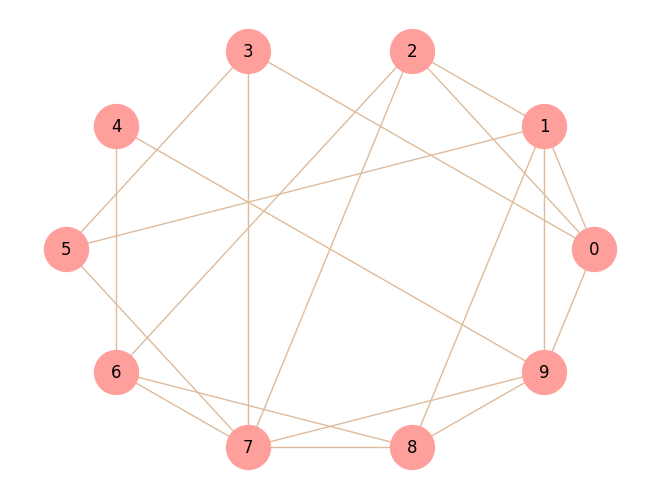

In [13]:
ws = make_ws_graph(10, 4, 0.2)
nx.draw_circular(ws,
                 node_color='C3',
                 edge_color='C5',
                 node_size=1000,
                 with_labels=True)

第二个图的测试

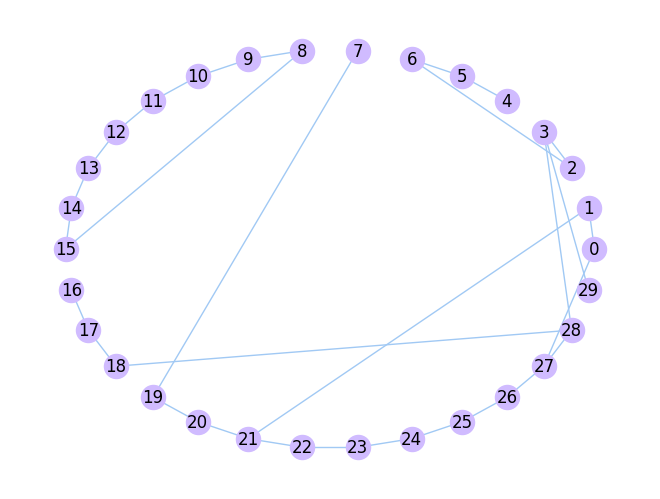

In [14]:
ws2 = make_ws_graph(30, 2, 0.2)
nx.draw_circular(ws2,
                 node_color='C4',
                 edge_color='C0',
                 node_size=300,
                 with_labels=True)

- 检查边的数量是否有变化。

In [15]:
len(lattice.edges()), len(ws.edges())

(20, 20)

In [16]:
len(lattice.edges()), len(ws2.edges())

(20, 30)

- 现在我们生成对应不同概率 `p` 的WS图。

(-1.2099999868273736,
 1.2099999987483026,
 -1.1507783259899071,
 1.1507784150000355)

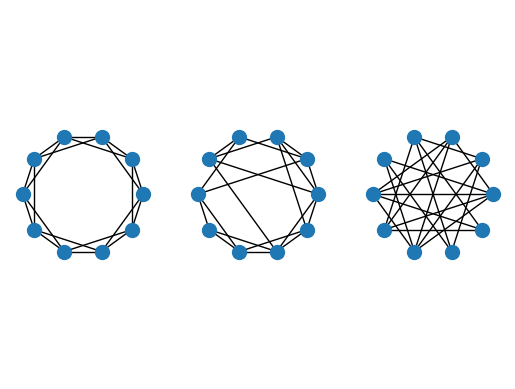

In [17]:
n = 10
k = 4
ns = 100

plt.subplot(1,3,1)
ws = make_ws_graph(n, k, 0)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

plt.subplot(1,3,2)
ws = make_ws_graph(n, k, 0.2)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

plt.subplot(1,3,3)
ws = make_ws_graph(n, k, 1.0)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

#TODO: Set figure size

修改n,k,p值后再次实验

(-1.2099999978045624,
 1.2099999997913837,
 -1.2033715042106379,
 1.203371529907038)

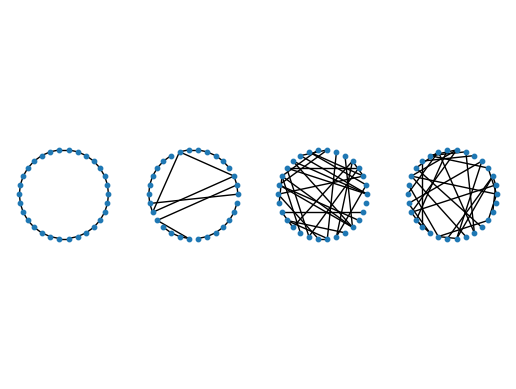

In [18]:
n = 30
k = 2
ns = 10

plt.subplot(1,4,1)
ws = make_ws_graph(n, k, 0)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

plt.subplot(1,4,2)
ws = make_ws_graph(n, k, 0.2)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

plt.subplot(1,4,3)
ws = make_ws_graph(n, k, 1.0)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

plt.subplot(1,4,4)
ws = make_ws_graph(n, k, 10.0)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

## 3.3 集聚系数

- 下面给出计算局部集聚系数的函数。

In [19]:
def node_clustering(G, u):
    """Computes local clustering coefficient for `u`.
    
    G: Graph
    u: node
    
    returns: float
    """
    neighbors = G[u]
    k = len(neighbors)
    if k < 2:
        return np.nan
        
    possible = k * (k-1) / 2
    exist = 0    
    for v, w in all_pairs(neighbors):
        if G.has_edge(v, w):
            exist +=1
    return exist / possible

def all_pairs(nodes):
    """Generates all pairs of nodes."""
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

- 网络平均集聚系数。

In [20]:
def clustering_coefficient(G):
    """Average of the local clustering coefficients.
    
    G: Graph
    
    returns: float
    """
    cu = [node_clustering(G, node) for node in G]
    return np.nanmean(cu)

- 对应 `k=4` 的环格, 每个节点的集聚系数是 $0.5$。

In [21]:
lattice = make_ring_lattice(10, 4)
node_clustering(lattice, 1)

0.5

对应 `k>6` 的环格, 每个节点的集聚系数会超过 $0.5$。

In [22]:
lattice = make_ring_lattice(10, 6)
node_clustering(lattice, 1)

0.6

- 环格网络的平均集聚系数也是 $0.5$。

In [23]:
clustering_coefficient(lattice)

0.5999999999999999

## 3.4 最短路径长度

- 如下函数计算所有节点对的最短路径长度。

In [24]:
def path_lengths(G):
    length_iter = nx.shortest_path_length(G)
    for source, dist_map in length_iter:
        for dest, dist in dist_map.items():
            yield dist

- 平均路径长度

In [25]:
def characteristic_path_length(G):
    path_length_with_zero = list(path_lengths(G))
    path_length_nonzero = [i for i in path_length_with_zero if i != 0]
    return np.mean(path_length_nonzero)

- 完全图的平均路径长度是1

In [26]:
complete = nx.complete_graph(3)
characteristic_path_length(complete)

1.0

参数换成30也一样

In [27]:
complete = nx.complete_graph(30)
characteristic_path_length(complete)

1.0

- 也可以直接使用 `average_shortest_path_length` 函数

In [28]:
complete = nx.complete_graph(3)
nx.average_shortest_path_length(complete)

1.0

- `n=1000`、`k=10` 环格的平均路径长度是50

In [29]:
lattice = make_ring_lattice(1000, 10)
characteristic_path_length(lattice)

50.450450450450454

In [30]:
lattice = make_ring_lattice(1000, 10)
nx.average_shortest_path_length(lattice)

50.450450450450454

n=1000，k=50的平均路径长度是10。长度为10是

In [31]:
lattice = make_ring_lattice(1000, 50)
nx.average_shortest_path_length(lattice)

10.49049049049049

## 3.5 WS实验

- 以下函数生成具有给定参数的WS图，并计算平均路径长度和聚集系数。

In [32]:
def run_one_graph(n, k, p):
    """Makes a WS graph and computes its stats.
    
    n: number of nodes
    k: degree of each node
    p: probability of rewiring
    
    returns: tuple of (mean path length, clustering coefficient)
    """
    ws = make_ws_graph(n, k, p)    
    mpl = characteristic_path_length(ws)
    cc = clustering_coefficient(ws)
    print(mpl, cc)
    return mpl, cc

- 测试 `n=1000`、`k=10`的实验。

In [33]:
%time run_one_graph(1000, 10, 0.01)

8.346136136136137 0.6438735209235209
CPU times: total: 1.03 s
Wall time: 1.04 s


(8.346136136136137, 0.6438735209235209)

- 设置多组概率 `p`。

侧式其对第二章图的效果

In [34]:
%time run_one_graph(1000, 50, 0.01)

3.0244764764764764 0.7144265859378557
CPU times: total: 1.89 s
Wall time: 1.89 s


(3.0244764764764764, 0.7144265859378557)

In [35]:
ps = np.logspace(-4, 0, 9)
print(ps)

ps2 = np.logspace(-8, 0, 9)
print(ps2)

[1.00000000e-04 3.16227766e-04 1.00000000e-03 3.16227766e-03
 1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00]
[1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]


- 如下函数对每个概率 `p` 值运行 `iters` 取去平均值，并输出平均路径长度和聚集系数。

In [36]:
def run_experiment(ps, n=1000, k=10, iters=20):
    """Computes stats for WS graphs with a range of `p`.
    
    ps: sequence of `p` to try
    n: number of nodes
    k: degree of each node
    iters: number of times to run for each `p`
    
    returns:
    """
    res = []
    for p in ps:
        print(p)
        t = [run_one_graph(n, k, p) for _ in range(iters)]
        means = np.array(t).mean(axis=0)
        print(means)
        res.append(means)
    return np.array(res)

- 运行WS网络实验。

In [37]:
%time res = run_experiment(ps)

0.0001
50.25895495495495 0.66635101010101
50.450450450450454 0.6666666666666665
46.92324324324324 0.6664232323232322
41.51795995995996 0.6662065656565656
50.450450450450454 0.6666666666666665
50.450450450450454 0.6666666666666665
50.450450450450454 0.6666666666666665
50.450450450450454 0.6666666666666665
37.192184184184185 0.6661075757575756
37.073245245245246 0.665890909090909
47.58264864864865 0.6662065656565656
50.450450450450454 0.6666666666666665
41.0911011011011 0.6663510101010099
50.450450450450454 0.6666666666666665
50.450450450450454 0.6666666666666665
38.53691091091091 0.6662787878787877
40.89997597597598 0.6658186868686867
50.450450450450454 0.6666666666666665
32.53438438438438 0.665890909090909
50.450450450450454 0.6666666666666665
[45.90575566  0.6664096 ]
0.00031622776601683794
36.59181181181181 0.6656020202020201
43.7353053053053 0.6662065656565656
45.68491491491491 0.665890909090909
34.891827827827825 0.6658186868686866
38.47397197197197 0.6661343434343433
34.7356276276

In [38]:
res

array([[4.59057557e+01, 6.66409596e-01],
       [3.92447310e+01, 6.65950556e-01],
       [2.73535957e+01, 6.64732273e-01],
       [1.65954380e+01, 6.61127778e-01],
       [9.06151121e+00, 6.48182532e-01],
       [5.93637738e+00, 6.06464405e-01],
       [4.43404424e+00, 4.91436142e-01],
       [3.57828228e+00, 2.18628311e-01],
       [3.26833373e+00, 9.03609314e-03]])

- 提取平均路径长度和聚集系数以方便绘图。

In [39]:
L, C = np.transpose(res)

In [40]:
L

array([45.90575566, 39.24473103, 27.3535957 , 16.59543804,  9.06151121,
        5.93637738,  4.43404424,  3.57828228,  3.26833373])

In [41]:
C

array([0.6664096 , 0.66595056, 0.66473227, 0.66112778, 0.64818253,
       0.60646441, 0.49143614, 0.21862831, 0.00903609])

- 数据归一化。

In [42]:
L /= L[0]
C /= C[0]

- 绘制平均路径长度和聚集系数的图像，验证 Watts 和 Strogatz 的实验结果。

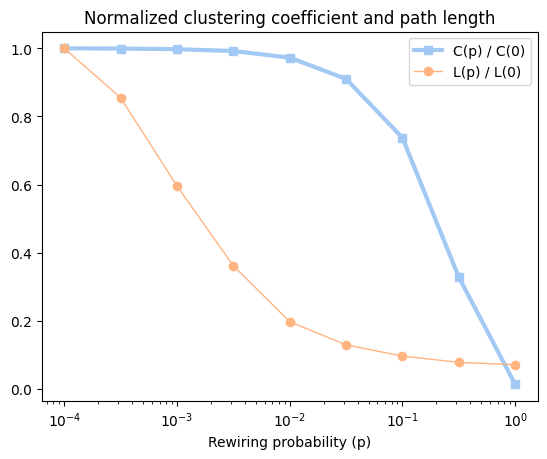

In [43]:
plt.plot(ps, C, 's-', linewidth=3, label='C(p) / C(0)')
plt.plot(ps, L, 'o-', linewidth=1, label='L(p) / L(0)')

plt.xlabel('Rewiring probability (p)')
plt.title('Normalized clustering coefficient and path length')
plt.xscale('log')
plt.xlim=[0.00009, 1.1] # plt.axis(xmin=0.00009, xmax=1.1, ymin=-0.01, ymax=1.01)
plt.ylim=[-0.01, 1.01]
# plt.loc='upper right'
plt.legend(loc='upper right')

## 3.6 广度优先搜索（BFS）

- 广度优先算法是Dijkstra最短路径算法的基础。

In [44]:
lattice = make_ring_lattice(10, 4)

建一个新图，n=30，k=2

In [45]:
lattice2 = make_ring_lattice(30, 2)

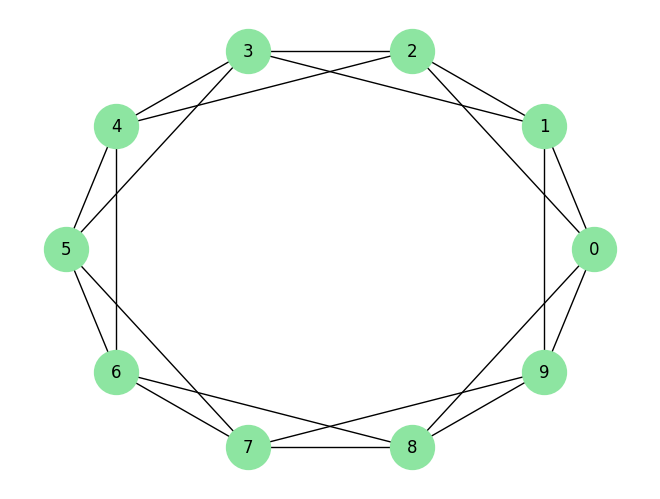

In [46]:
nx.draw_circular(lattice, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)

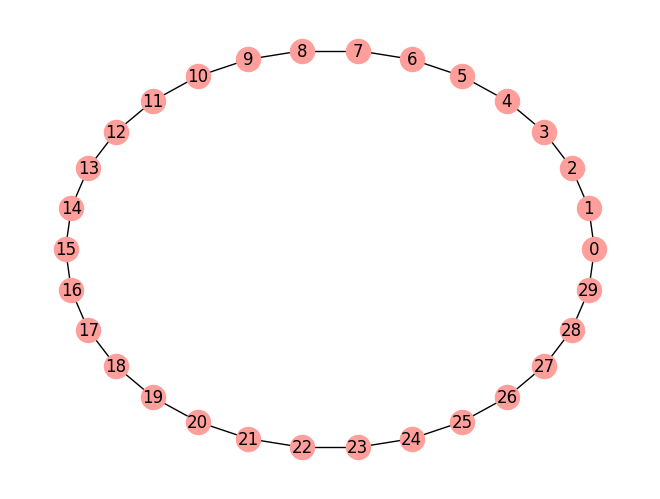

In [47]:
nx.draw_circular(lattice2, 
                 node_color='C3', 
                 node_size=300, 
                 with_labels=True)

- 利用双端队列 `deque` 实现BFS。

In [48]:
from collections import deque

def reachable_nodes_bfs(G, start):
    """Finds reachable nodes by BFS.
    
    G: graph
    start: node to start at
    
    returns: set of reachable nodes
    """
    seen = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in seen:
            seen.add(node)
            queue.extend(G.neighbors(node))
    return seen

- 测试

In [49]:
reachable_nodes_bfs(lattice, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

对图2运用BFS的结果

In [50]:
reachable_nodes_bfs(lattice2, 0)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29}

- 以下代码会快些。

In [51]:
def reachable_nodes_bfs(G, start):
    """Finds reachable nodes by BFS.
    
    G: graph
    start: node to start at
    
    returns: set of reachable nodes
    """
    seen = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in seen:
            seen.add(node)
            neighbors = set(G[node]) - seen
            queue.extend(neighbors)
    return seen

- 测试

In [52]:
reachable_nodes_bfs(lattice, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [53]:
reachable_nodes_bfs(lattice2, 0)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29}

In [54]:
lattice3 = make_ring_lattice(3000, 2)
reachable_nodes_bfs(lattice3, 0)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


## 3.7 Dijkstra 算法

- 我们给出该算法的一个简化版本，假设所有边长度相同。

In [55]:
def shortest_path_dijkstra(G, source):
    """Finds shortest paths from `source` to all other nodes.
    
    G: graph
    source: node to start at
    
    returns: make from node to path length
    """
    dist = {source: 0}
    queue = deque([source])
    while queue:
        node = queue.popleft()
        new_dist = dist[node] + 1

        neighbors = set(G[node]).difference(dist)
        for n in neighbors:
            dist[n] = new_dist
        
        queue.extend(neighbors)
    return dist

- 在环格上进行测试。

In [56]:
lattice = make_ring_lattice(10, 4)

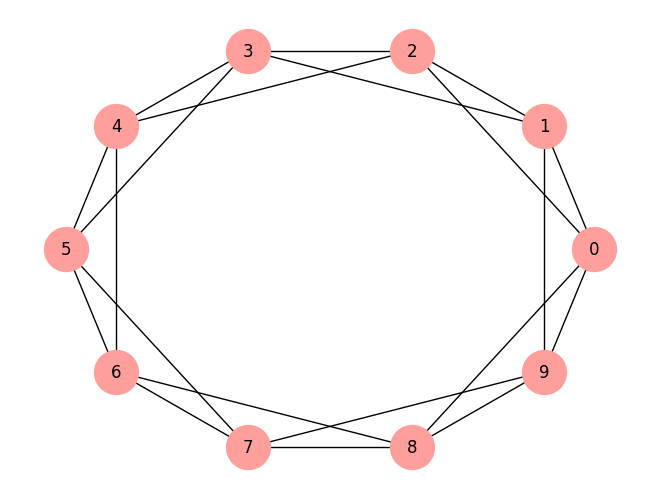

In [57]:
nx.draw_circular(lattice, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)

In [58]:
lattice2 = make_ring_lattice(30, 12)

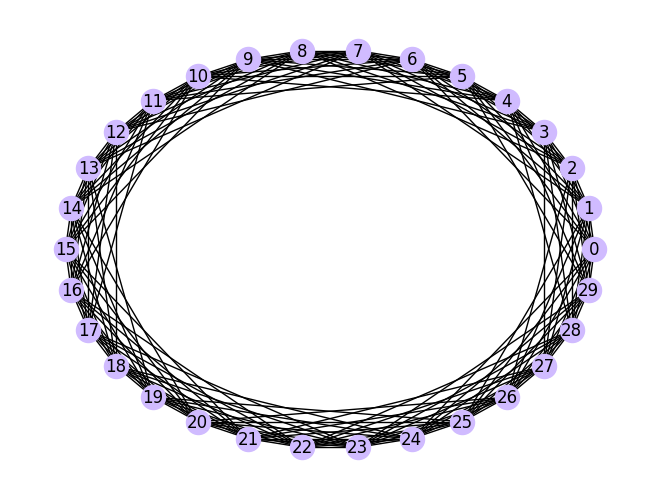

In [59]:
nx.draw_circular(lattice2, 
                 node_color='C4', 
                 node_size=300, 
                 with_labels=True)

- 测试

In [60]:
d1 = shortest_path_dijkstra(lattice, 0)
d1

{0: 0, 8: 1, 1: 1, 2: 1, 9: 1, 6: 2, 7: 2, 3: 2, 4: 2, 5: 3}

In [61]:
d1_1 = shortest_path_dijkstra(lattice2, 0)
d1_1

{0: 0,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 18: 2,
 19: 2,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 13: 3,
 14: 3,
 15: 3,
 16: 3,
 17: 3}

- 利用NetworkX得到的结果。

In [62]:
d2 = nx.shortest_path_length(lattice, 0)
d2

{0: 0, 8: 1, 1: 1, 2: 1, 9: 1, 3: 2, 4: 2, 6: 2, 7: 2, 5: 3}

In [63]:
d2_1 = nx.shortest_path_length(lattice2, 0)
d2_1

{0: 0,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 18: 2,
 19: 2,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 13: 3,
 14: 3,
 15: 3,
 16: 3,
 17: 3}

- 看看结果是否相同。

In [64]:
d1 == d2

True

第二个图结果也相同

In [65]:
d1_1 == d2_1

True